In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [5]:
list(data)

['index',
 'longitude',
 'latitude',
 't',
 'loc_x',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3los

#### Calculate the lumped equivalency concentrations 

In [6]:
data['pt3'] = data['o3prod_mole_stacked'] - data['pt1'] - data['pt2']
data['pt7'] = data['o3loss_mole_stacked'] - data['pt4'] - data['pt5'] - data['pt6']

data['etoo_eq_mole'] = data['pt3']/data['k18']/data['no_mole']
data['isop_eq_mole'] = data['pt7']/data['k27']/data['o3_mole']

In [59]:
data['LER'] = data['etoo_eq_mole']/data['isop_eq_mole']
data['LER_1'] = data['isop_eq_mole']/data['etoo_eq_mole']

data['LER_NOx'] = data['etoo_eq_mole']/data['nox_mole']

In [60]:
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*10**9
data['pan_mole']  = data['pan'] *1.01325*10**5/data['tas']*7.243*10**7*10**9

In [61]:
data['nox_mole'] = data['no_mole']+data['no2_mole']
data['noz_mole'] = data['hno3_mole']+data['pan_mole']
data['noy_mole'] = data['nox_mole']+data['noz_mole']

In [62]:
data['FNR_NO2'] = data['hcho_mole']/data['no2_mole']
data['FNR_NOx'] = data['hcho_mole']/data['nox_mole']
data['FNR_NOy'] = data['hcho_mole']/data['noy_mole']

In [63]:
data['VOC_NOx'] = data['emivoc']/data['eminox']

In [64]:
sens = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/region sensitivities.csv')

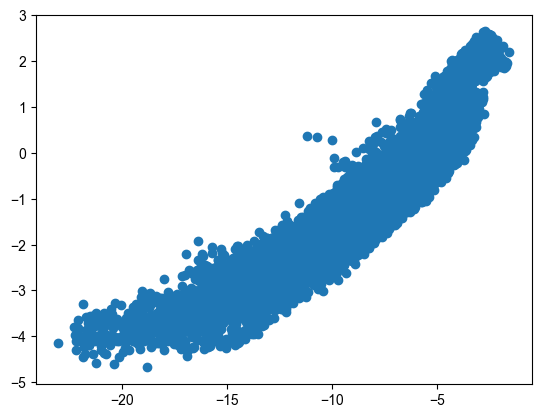

In [65]:
data['LER'] = data['etoo_eq_mole']/data['no2_mole']
plt.scatter(np.log(data['LER']), np.log(data['FNR_NO2']))

In [74]:
LER = data.groupby(['region']).mean()['LER']
LER_1 = data.groupby(['region']).mean()['LER_1']
LER_NOx = data.groupby(['region']).mean()['LER_NOx']

FNR_NO2 = data.groupby(['region']).mean()['FNR_NO2']
FNR_NOx = data.groupby(['region']).mean()['FNR_NOx']
FNR_NOy = data.groupby(['region']).mean()['FNR_NOy']

VOC_NOx = data.groupby(['region']).mean()['VOC_NOx']

In [75]:
diag = pd.DataFrame(LER)
diag['LER_1'] = LER_1
diag['LER_NOx'] = LER_NOx
diag['FNR_NO2'] = FNR_NO2
diag['FNR_NOx'] = FNR_NOx
diag['FNR_NOy'] = FNR_NOy
diag['VOC_NOx'] = VOC_NOx
diag = diag.merge(sens, how='left', left_on=['region'], right_on=['Region'])
diag

,LER,LER_1,LER_NOx,FNR_NO2,FNR_NOx,FNR_NOy,VOC_NOx,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,4.808266e-04,594.242724,3.664202e-04,0.442976,0.339545,0.282332,5.233270,AUS,0.678558,0.138674,0.729637,0.056665,0.929994,0.7189
1,2.987050e-02,548.190722,2.417422e-02,5.869522,4.778274,3.453524,98.626424,BRA,1.039605,0.050838,0.376353,0.101639,2.762317,0.6515
2,6.264894e-07,304895.519095,2.741618e-07,0.047615,0.016951,0.015405,0.429687,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
3,2.023226e-05,10023.864771,1.450534e-05,0.134980,0.087567,0.071310,1.086755,CA,-0.437245,0.274061,1.664630,0.067024,-0.262668,0.8040
4,2.525674e-04,71321.988777,1.937151e-04,0.226974,0.152555,0.105618,3.022450,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
5,1.874196e-02,691.184837,1.554839e-02,5.273861,4.383426,2.704649,86.086558,COD,0.388597,0.018685,0.182689,0.144989,2.127096,0.8318
6,2.109584e-05,162519.270211,1.596165e-05,0.094952,0.070207,0.054576,0.556930,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560
7,9.894485e-04,24028.171355,7.643561e-04,0.455269,0.352753,0.230105,3.494706,FIN,0.159276,0.331664,1.598572,0.108084,0.099636,0.7163
8,1.793706e-04,17933.103204,1.447713e-04,0.226906,0.181944,0.131786,1.932617,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,4.433912e-05,35171.844390,3.086476e-05,0.237045,0.140955,0.111089,2.103838,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432


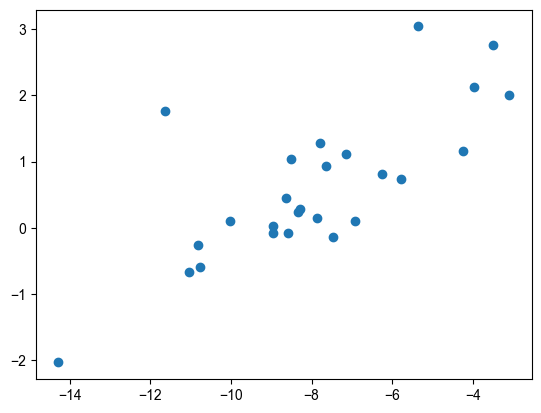

In [81]:
plt.scatter(np.log(diag['LER']), (diag['SnSv']))

In [69]:
sens

,Region,Sn,Sn_err,Sv,Sv_err,SnSv,R2
0,BTH,-9.901132,0.183759,4.863086,0.174193,-2.035977,0.8649
1,GBA,0.147599,0.099539,1.497546,0.056190,0.098561,0.9432
2,CCE,0.344900,0.084865,1.208617,0.033495,0.285367,0.8741
3,YYN,1.673687,0.722490,1.303109,0.111641,1.284380,0.8195
4,QTP,3.846261,0.129504,1.263858,0.040323,3.043270,0.9387
5,KOR,-0.118734,0.239789,1.448416,0.076737,-0.081975,0.8943
6,JPN,-0.115629,0.076568,1.353738,0.053426,-0.085415,0.8596
7,GBR,-1.642956,0.112649,2.431756,0.110473,-0.675625,0.8225
8,FRA,0.466664,0.080890,1.024897,0.032964,0.455327,0.7047
9,DEU,-1.182926,0.282724,2.000965,0.089983,-0.591178,0.8560


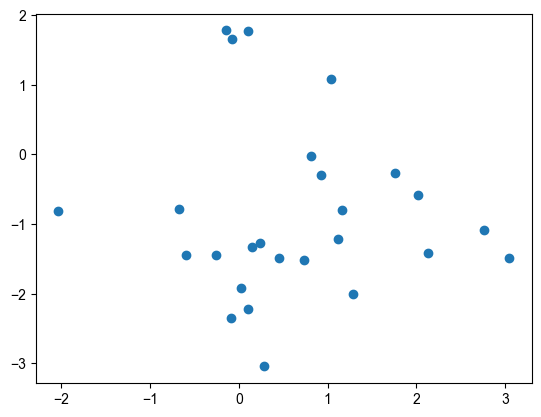

In [56]:
plt.scatter(sens['SnSv'], np.log(FNR_NO2))

#### Calculate dynamic regression 

In [3]:
d_ho2_oh_beta = data.groupby('region').apply(lambda g: sm.OLS(g['ho2_mole'], g[['oh_mole']]).fit().params)
d_ho2_oh_ste = data.groupby('region').apply(lambda g: sm.OLS(g['ho2_mole'], g[['oh_mole']]).fit().HC0_se)

#### Calculate features

In [4]:
a = data['k5'].mean()
#b = data['k8'].mean()
b = 6.34*10**(-15)
c = data['k6'].mean()

data['c'] = data['co_mole']*a/c + data['hcho_mole']
#data['c'] = data['co_mole'] + data['hcho_mole']
#data['c'] = data['co_mole']
data['co_hcho__no'] = data['c']/data['no_mole']
feat = data.groupby('region').mean()[['co_hcho__no']]
feat = pd.DataFrame(feat)
feat_std = data.groupby('region').std()['co_hcho__no']
feat_ct = data.groupby('region').count()['co_hcho__no']
feat_ste = pd.DataFrame(feat_std/np.sqrt(feat_ct/5))

In [5]:
mod = LinearRegression()
X = feat[['co_hcho__no']]
y = d_ho2_oh_beta['oh_mole']
mod.fit(X,y)
y_pred = mod.predict(X)

In [6]:
d_ho2_oh_beta['beta_adj'] = d_ho2_oh_beta['oh_mole']*0.5 + y_pred*0.5
d_ho2_oh_beta['co_hcho__no'] = feat['co_hcho__no']
d_ho2_oh_beta['beta_adj_ste'] = d_ho2_oh_ste
d_ho2_oh_beta['co_hcho__no_ste'] = feat_ste

([<matplotlib.axis.XTick at 0x7fe53ec78160>,
 [Text(0, 0, '0'), Text(2, 0, '2'), Text(4, 0, '4'), Text(6, 0, '6')])

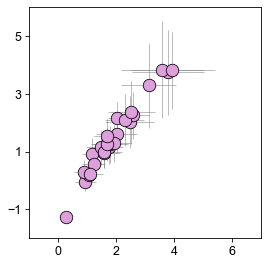

In [13]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
x_values = np.log(d_ho2_oh_beta['beta_adj'])
y_values = np.log(d_ho2_oh_beta['co_hcho__no'])
x_errors = (d_ho2_oh_beta['beta_adj_ste'])**0.5
y_errors = (d_ho2_oh_beta['co_hcho__no_ste'])**0.5

plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='plum', mec='black', ms=12, alpha=1, mew=0.75)

plt.xlim([-1,7])
plt.ylim([-2,6])
plt.yticks([-1,1,3,5], fontsize=12)
plt.xticks([0,2,4,6], fontsize=12)

In [8]:
d_ho2_oh_beta = d_ho2_oh_beta[['beta_adj', 'beta_adj_ste', 'co_hcho__no', 'co_hcho__no_ste']]
d_ho2_oh_beta['ln_beta_adj'] = np.log(d_ho2_oh_beta['beta_adj'])
d_ho2_oh_beta['ln_co_hcho__no'] = np.log(d_ho2_oh_beta['co_hcho__no'])
d_ho2_oh_beta['ln_beta_adj_ste'] = np.log(d_ho2_oh_beta['beta_adj_ste'])
d_ho2_oh_beta['ln_co_hcho__no_ste'] = np.log(d_ho2_oh_beta['co_hcho__no_ste'])

d_ho2_oh_beta.to_csv('I7 HO2_OH.csv')